# Linear Regresion

- 데이터의 Parameter들 간의 상호 정량적관계(Quantization)를 알아내는 것
- 정성적 해석 : 할머니 허리가 아프면, 비가 자주 오더라.
- 정량적 해석 : 할머니의 허리 아픈 정도를 1~3 으로 표현했을 때, 그것이 3일 때, 비올 확률은 70%였다.

In [2]:
import numpy as np
import lib.byonda as bnd
import matplotlib.pyplot as plt

In [3]:
# 할머니의 허리 아픔 정도를 Vector X로 표현해보자.
X = np.array([1, 2, 3])

# 강수량을 Vector Y 로 표현해보자.
Y = np.array([30, 50, 70])

X, Y

(array([1, 2, 3]), array([30, 50, 70]))

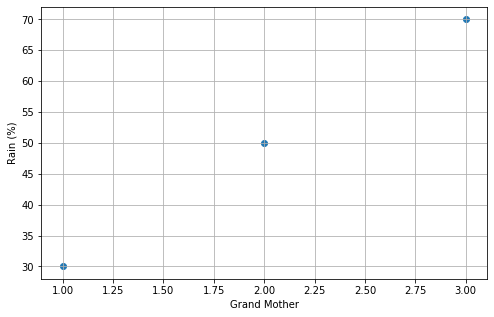

In [4]:
plt.figure(figsize=(8, 5)) 
plt.scatter(X, Y)
plt.xlabel("Grand Mother")
plt.ylabel("Rain (%)")
plt.grid()

- 그렇다면, 할머니 허리 아픔 정도가 4라고 했을 때, 강수량은 얼마나 될까?
- 두 Vetor 변수의 관계를 하나의 직선으로 표현하는 것을 선형회귀(Linear Regression)이라 한다.
- 이 직선의 방정식을 ${f(w, b)}=wx+b$ 라고 해보자.
- Weight와 Bias에 아무 값이나 넣어 보자

In [5]:
w = 15
b = 8
Y_hat = w * X + b

print(Y)
print(Y_hat)

[30 50 70]
[23 38 53]


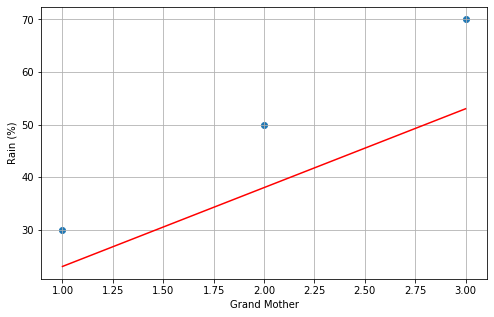

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y)
plt.xlabel("Grand Mother")
plt.ylabel("Rain (%)")
plt.plot(X, Y_hat, color='r')
plt.grid()

# Cost Function 이란 무엇안가?
- 우리가 추정한 직선이 얼마나 잘못되었는가를 정량화한 함수를 Cost 함수라고 한다.
- Regression 문제는 최소제곱법(Least Square Method)을 주로 쓴다.
- 이차함수를 최소화하는 optimization 문제의 일종으로 $\mathrm{min}_{x} ||Ax - b ||^2$로 쓸 수 있다.

<img src="./img/LS5.png" width='250' align="Left">

<img src="./img/graph2.png" width="500" align="Left">

$ = \mathrm{min}_{f(w, b)} 1/m \sum_{i=1}^{m} (  wx_{i} + b - y_{i})^2$

$ = \mathrm{min}_{f(w, b)} 1/m \sum_{i=1}^{m} (  x_{i}^2w^2 + 2x_{i}bw + 2by_{i} + 2x_{i}y_{i}w + b^2 - y_{i}^2)$

In [8]:
# Python으로 실제 위의 식을 계산해보자.
def cost(a, b) :
    return np.square(a-b).sum() / len(a)

cost : 0.0


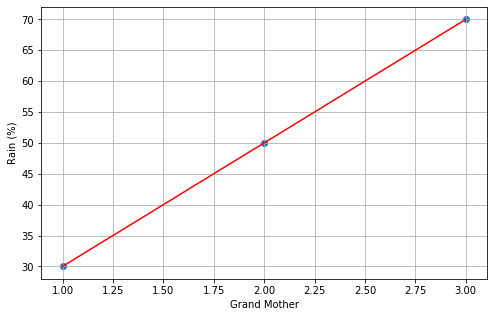

In [10]:
plt.figure(figsize=(8, 5))

# 간소화된 데이터로 다시 한번 살펴보자.
X = np.array([1, 2, 3]) # 할머니의 허리 아픔 정도를 Vector X로 표현해보자.
Y = np.array([30, 50, 70]) # 강수량을 Vector Y 로 표현해보자.

# 이상적인 W, b를 넣고 계산해보자.
w, b = 20, 10
Y_hat = w * X + b

plt.scatter(X, Y)
plt.xlabel("Grand Mother")
plt.ylabel("Rain (%)")
plt.plot(X, Y_hat, color='r')
plt.grid()

print("cost :", cost(Y, Y_hat))

# Convex Problem
- Cost 함수는 ${w}$에 대해서도, ${b}$에 대해서도, Convex한 2차 함수이다.
- ${b}$ 에 대한 그래프는 생략

Text(0, 0.5, 'Cost')

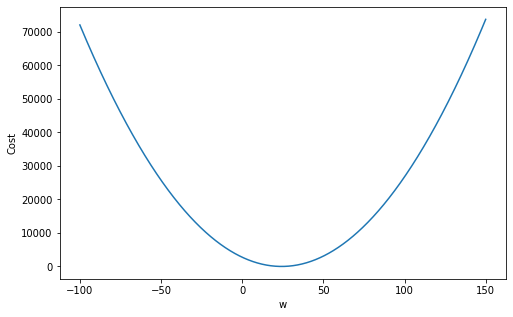

In [11]:
w_s = np.linspace(-100, 150, 1000)
b = 0
cost_arr = []

for w in w_s :
    Y_hat = w * X + b
    cost_arr.append(cost(Y, Y_hat))
    
cost_arr = np.array(cost_arr)

plt.figure(figsize=(8, 5))
plt.plot(w_s, cost_arr)
plt.xlabel("w")
plt.ylabel("Cost")

- Convex 한 함수의 최소값은 미분을 해서 0인 지점
- ${w}$에 대해서, 그리고 ${b}$ 에 대해서 편미분을 수행한다.

- ${cost(w,b)} = \mathrm{min}_{f(w, b)} \sum_{i=1}^{m} (  x_{i}^2w^2 + 2x_{i}bw + 2by_{i} + 2x_{i}y_{i}w + b^2 - y_{i}^2)$

- $ w 기울기 = \sum_{i=1}^{m} ( 2x_{i}^2w + 2x_{i}b - 2x_{i}y_{i}) \cdot 1/n$
- $ b 기울기 = \sum_{i=1}^{m} ( 2x_{i}w - 2y_{i} +2b) \cdot 1/n$

In [12]:
# 편미분 1
def gradient_weight(x, y, w, b) :
    return (2*np.square(x)*w + 2*x*b - 2*x*y).sum() / len(x)

# 편미분 2
def gradient_bias(x, y, w, b) :
    return (2*x*w - 2*y + 2*b).sum() / len(x)

In [13]:
# 이상적인 W를 넣고, 함수가 똑바로 동작하는지 확인하자
w = 20
b = 10

print("w에 대한 기울기 :", gradient_weight(X, Y, w, b))
print("b에 대한 기울기 :", gradient_bias(X, Y, w, b))

w에 대한 기울기 : 0.0
b에 대한 기울기 : 0.0


# 경사하강법(Gradient Decent)

<img src="./img/sgd.gif" align="Left"/>
<img src="./img/sgd_bad.gif" align="Left"/>

- $ (w기울기 > 0) : w = w - (Learning Rate) \cdot w 기울기 $
- $ (w기울기 < 0) : w = w + (Learning Rate) \cdot w 기울기 $
- $ (b기울기 > 0) : b = b - (Learning Rate) \cdot w 기울기 $
- $ (b기울기 < 0) : b = b + (Learning Rate) \cdot w 기울기 $

In [14]:
# Gradient Descent
def grad_desc(X, Y, w, b, epoch, lr, tol) :    
    for i in range(epoch) :
        grd_w = gradient_weight(X, Y, w, b)
        grd_b = gradient_bias(X, Y, w, b)
        
        if grd_w > 0 :
            w = w - lr*grd_w
        elif grd_w < 0 :
            w = w - lr*grd_w
            
        if grd_b > 0 :
            b = b - lr*grd_b
        elif grd_b < 0 :
            b = b + lr*grd_b
            
        if np.abs(grd_w) < tol and np.abs(grd_b) < tol :
            print("tolerance !")
            break
    
    print("last epoch :", i)            
    return w, b

In [15]:
# 할머니의 허리 아픔 정도를 Vector X로 표현해보자.
X = np.array([1, 2, 3])

# 강수량을 Vector Y 로 표현해보자.
Y = np.array([30, 50, 70])

- 실제로는 w, b 값을 모르기 때문에 아무거나 넣어본다.
- 이것을 Hyper Parameter Tuning 이라고 한다.
- 이 다섯가지의 Parameter를 잘 Tuning해야 한다.
- 우선 Epoch을 모두 다 수행하는지 봐야함 (tolerance 동작여부 확인)
- epoch을 아무리 늘려도 tolerance가 동작하지 않는다면 

In [16]:
'''
    Hyper Paramter
'''
w = 10
b = 10
epoch = 1000
lr = 0.001
tol = 3.0

# 실제로 이상적인 값은 w = 20, b = 10
w, b = grad_desc(X, Y, w, b, epoch, lr, tol)
print("result :", int(w), int(b))

tolerance !
last epoch : 488
result : 22 4


In [17]:
X_test = np.array([1, 2, 3, 4])
Y_hat = w * X_test + b

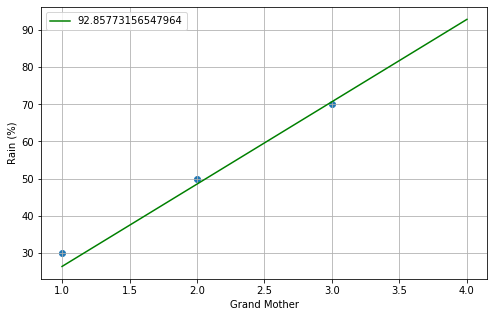

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y) # 실제값
plt.plot(X_test, Y_hat, color='Green', label=Y_hat[-1]) #예측값
plt.xlabel("Grand Mother")
plt.ylabel("Rain (%)")
plt.legend()
plt.grid()

- 대규모 데이터에 적용해보자.

In [19]:
X, Y = bnd.get_linear_data(50)


'''
    Hyper Paramter
'''
w = 10
b = 10
epoch = 10000
lr = 0.001
tol = 0.05

# 실제로 이상적인 값은 w = 20, b = 10
w, b = grad_desc(X, Y, w, b, epoch, lr, tol)
print("result :", w, b)

tolerance !
last epoch : 8212
result : 1.963543318327992 -0.8153912550878224


In [20]:
X_test = X.copy()
Y_hat = w * X + b

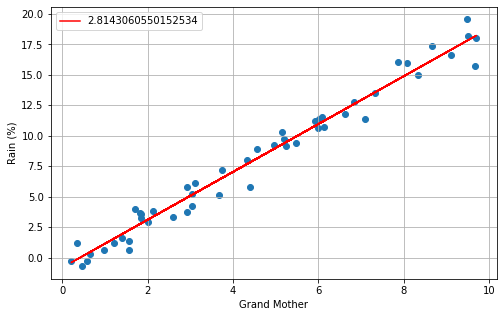

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y) # 실제값
plt.plot(X_test, Y_hat, color='r', label=Y_hat[-1]) #예측값
plt.xlabel("Grand Mother")
plt.ylabel("Rain (%)")
plt.legend()
plt.grid()

# Logistic Regresion
- 비올 확률이 얼마인지와 우산을 가지고 외출할지 말지를 결정하는 것은 다른 이야기이다.
- 비가 올지 말지를 간주하는 범주형 데이터로 문제를 바꾸어 보자.

In [22]:
X, Y = bnd.get_linear_data(50)
Y[Y < 10] = 0 # 비가 안 옴 : 0
Y[Y > 10] = 1 # 비가 옴 : 1

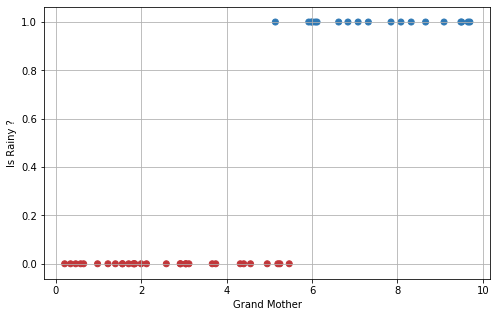

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, c=Y, cmap='RdBu', vmin = -.2, vmax = 1.2)
plt.xlabel("Grand Mother")
plt.ylabel("Is Rainy ?")
plt.grid()

- 이런데이터에는 직선의 관계식을 도출할 수가 없다.
- Linear Regression을 통해 ${H(w, b)}=wx+b$ 라는 방정식을 적용하면, 대부분의 Scatter가 오류로 빠질 것이다.

In [24]:
'''
    Hyper Paramter
'''
w = 10
b = 10
epoch = 10000
lr = 0.001
tol = 0.05

# 실제로 이상적인 값은 w = 20, b = 10
w, b = grad_desc(X, Y, w, b, epoch, lr, tol)
print("result :", w, b)

tolerance !
last epoch : 8032
result : 0.12960218563171805 -0.17294656784216864


Total : 50
Corre : 46


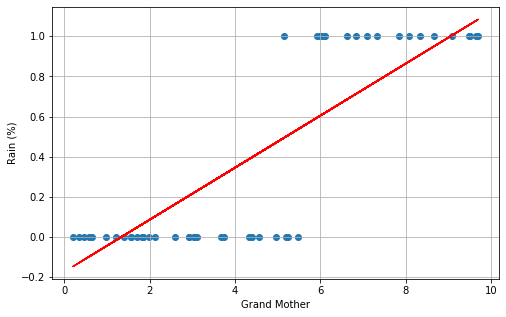

In [25]:
Y_hat = w * X + b

plt.figure(figsize=(8, 5))
plt.scatter(X, Y)
plt.xlabel("Grand Mother")
plt.ylabel("Rain (%)")
plt.plot(X, Y_hat, color='r')
plt.grid()

print("Total :", len(X))
print("Corre :", np.sum(np.round(Y_hat)==Y))

- 시모이드 함수를 이용하면 이와 같은 문제를 해결할 수 있다.
- $f(w,b) = \dfrac{1}{1+e^{(wx+b)}}$ 라 하자

In [26]:
def sigmoid(x, w, b):
    result = 1 / (1 + np.exp(w*x+b))
    return result

Total : 50
Corre : 49


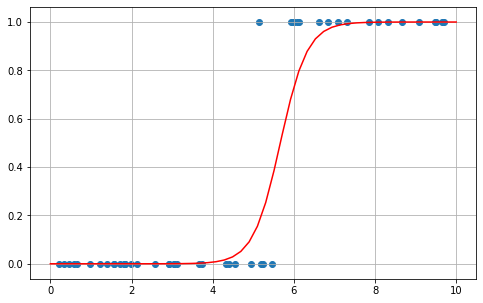

In [28]:
w = -3
b = 17

X_sorted = np.linspace(0, 10, 50)
Y_hat = sigmoid(X_sorted, w, b)

plt.figure(figsize=(8, 5))
plt.scatter(X, Y)
plt.plot(X_sorted, Y_hat, color='r')
plt.grid()

print("Total :", len(X))
print("Corre :", np.sum(np.round(sigmoid(X, w, b))==Y))

- Logistic Regression에서는 Cross Entropy 함수를 Loss Function으로 사용한다.
- 애석하게도 Corss Entropy 함수는 Closed-form Solution 이 존재하지 않는다.
- Backward Chain 방법을 써야하는데, Coding 하기 까다롭다.

Cross Entrpy : $ {l}_{i}(\hat{y}_{i}, y_{i}) =  - y_{i}  \log(\hat{y}_{i}) - (1-y_{i} )  \log(1-\hat{y}_{i}) $

$ J = \frac{1}{m} \sum_{i=1}^m {l}_{i}(\hat{y}^{(i)}, y^{(i)})$

$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})\log(1-\hat{y}^{(i)})$

$ \frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^m x^{(i)}(\hat{y}^{(i)}-y^{(i)}) = \frac{1}{m}X(\hat{Y}-Y)^T$

$ w = w - \alpha ~ \dfrac{dJ(w)}{dw} (w : parameter, \alpha : step size or learning rate)$

# Scikit-Learn
- Scikit-Learn 파이썬 프레임워크는 분류, 회귀, 데이터 준비를 위한 다양한 기능 제공
- 탄탄한 학습 알고리즘, 설치, 학습 사용이 쉬움
- 단, 딥러닝, GPU는 지원하지 않음

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

import numpy as np
import matplotlib.pyplot as plt

In [30]:
X, Y = bnd.get_linear_data(50)
Y[Y < 10] = 0.0 # 비가 오는 것을 1.0
Y[Y > 10] = 1.0 # 그렇지 않은 것을 0.0으로 간주한다.

# Scikit-Learn은 1차원 데이터를 처리하지 못함
# Vector로 정규화 되어 있음
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)

In [31]:
log_reg = LogisticRegression() #Define classifier name "log_reg"
log_reg.fit(X, Y) #Estimate the parameter Theta

/home/chinkwan80/anaconda3/envs/tn14/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/chinkwan80/anaconda3/envs/tn14/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#Plot 0 to 3 with 1000 points
X_sorted = np.linspace(0, 10, 50).reshape(-1,1)
Y_hat = log_reg.predict_proba(X_sorted)

Total : 50
Corre : 50
Cross Entropy : 2.0723745595404535


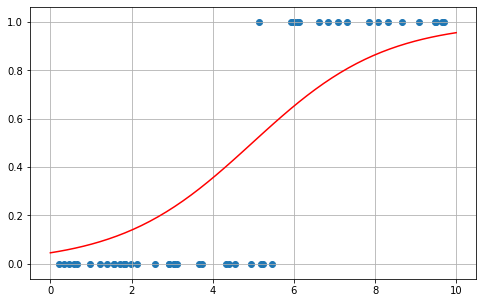

In [39]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y)
plt.plot(X_sorted, Y_hat[:,1], c='r')
plt.grid()

print("Total :", len(X))
print("Corre :", np.sum(np.round(log_reg.predict_proba(X))==Y))
print("Cross Entropy :", log_loss(Y, log_reg.predict(X)))

# Logistic regression (using 2 features)
- 원인 인자가 반드시 하나란 법은 없다.
- Feature 1) 할머니 허리 아픔과 동시에, Feature 2) 일기예보도 알아보고, 우산 소지 여부를 결정
- $f_{a, b, c}(x_1, x_2) = \dfrac{1}{1+e^{(ax_1 + bx_2 + c)}}$

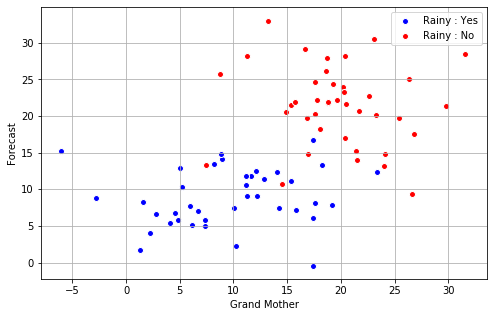

In [2]:
import lib.byonda as bnd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

(X, Y), _ = bnd.generate_normal(100)

plt.figure(figsize=(8, 5)) 
plt.scatter(X[Y==1, 0], X[Y==1, 1], c='b', label = "Rainy : Yes", edgecolor="white")
plt.scatter(X[Y==0, 0], X[Y==0, 1], c='r', label = "Rainy : No", edgecolor="white")
plt.xlabel("Grand Mother")
plt.ylabel("Forecast")
plt.grid()
plt.legend()

- Scikit Learn으로 이 문제를 해결해보자
- 먼저 모델을 학습시키고,
- Prediction을 수행한다.
- 등고선을 그리기 위해, Input 값을 Mesh-Grid로 생성했다.
- $ {l}_{i}(\hat{y}_{i}, y_{i}) =  - y_{i}  \log(\hat{y}_{i}) - (1-y_{i} )  \log(1-\hat{y}_{i}) $

In [4]:
log_reg = LogisticRegression()
log_reg.fit(X, Y)

/home/chinkwan80/anaconda3/envs/tn14/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
#2-dimensional coordinate.
XX1, XX2 = np.meshgrid(np.arange(-7.0, 40, 0.1), np.arange(-4.0, 40, 0.1))
Y_hat = log_reg.predict(np.c_[XX1.ravel(), XX2.ravel()])
YY_hat = Y_hat.reshape(XX1.shape)

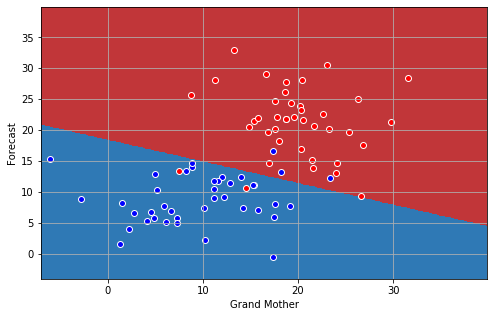

In [6]:
plt.figure(figsize=(8, 5)) 
plt.pcolormesh(XX1, XX2, YY_hat, cmap = "RdBu", vmin = -.2, vmax = 1.2)
plt.scatter(X[Y==1, 0], X[Y==1, 1], c='b', label = "Rainy : Yes", edgecolor="white")
plt.scatter(X[Y==0, 0], X[Y==0, 1], c='r', label = "Rainy : No", edgecolor="white")
plt.xlabel("Grand Mother")
plt.ylabel("Forecast")
plt.grid()

In [7]:
print("Total :", len(X))
print("Corre :", np.sum(log_reg.predict(X)==Y))
print("Cross Entropy :", log_loss(Y, log_reg.predict(X)))

Total : 80
Corre : 75
Cross Entropy : 2.1586935146176733
